In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import scipy.stats as s
import pyodbc

In [3]:
df = pd.read_csv('bestia.csv', dtype={'NewUserId': str})

In [4]:
pd.set_option('display.max_columns', None)
df

Unnamed: 0            ClientID  ContentID  AvgTimeOnPage  ViewsCount  \
0                 0  629835214461368392  0574C-77X          14435           1   
1                 1  629835214461368392  1072H-85X          10067           1   
2                 2  629835214461368392  1870I-99X          23176           1   
3                 3  629835214461368392  2899H-99X          11639           1   
4                 4  629835214461368392  4918B-87X          20549           1   
...             ...                 ...        ...            ...         ...   
8935202     9367646   99506894811688260  4966C-65X          18751           1   
8935203     9367647   99506894811688260  5577B-59X           4823           2   
8935204     9367648   99506894811688260  5577B-79X          14273           3   
8935205     9367649   99506894811688260  5577B-87X           6954           2   
8935206     9367650   99506894811688260  5622B-40X          69377           2   

         WasAddedToCart  WasBought  RecommendationClickCount  OpenSizeTab  \
0                 False      False                         0        False   
1                 False      False                         0        False   
2                 False      False                         0        False   
3                 False      False                         0        False   
4                 False      False                         0        False   
...                 ...        ...                       ...          ...   
8935202           False      False                         0        False   
8935203           False      False                         0        False   
8935204            True      False                         0        False   
8935205           False      False                         0        False   
8935206           False      False                         0        False   

         ChangeImage  AccordionExpand           NewUserId  RegisterFlag  \
0                  5                0  629835214461368392         False   
1                  4                0  629835214461368392         False   
2                 11                0  629835214461368392         False   
3                  4                0  629835214461368392         False   
4                  5                0  629835214461368392         False   
...              ...              ...                 ...           ...   
8935202            8                0             6884663          True   
8935203            3                0             6884663          True   
8935204           11                0             6884663          True   
8935205            5                0             6884663          True   
8935206            3                0             6884663          True   

                                Characteristic SaleStatus PriceCategory  \
0                                  długi rękaw       Sale           MIP   
1                                      płaszcz    Nonsale           HIP   
2                            midi, długi rękaw    Nonsale           MIP   
3                    mokasyny, skóra naturalna    Nonsale           MIP   
4         proste, luźne, high-waisted, dresowe    Nonsale           MIP   
...                                        ...        ...           ...   
8935202                    długi rękaw, gładka       Sale           HIP   
8935203                       chino, z paskiem    Nonsale           MIP   
8935204                       chino, z paskiem    Nonsale           MIP   
8935205                       chino, z paskiem    Nonsale           MIP   
8935206                           krótki rękaw       Sale           HIP   

                             AvSizes FashionLevel ItemSeason  SubclassID  \
0                 34, 36, 38, 40, 42    Core Wall    SS 2021        17.0   
1                        L, M, S, XL         Core    AW 2021       637.0   
2                        L, M, S, XS         Core    AW 2021       628.0   
3    

In [5]:
df.drop(['Unnamed: 0','ClientID','ContentID',"AvSizes","Characteristic",'AvSizes',"DepartmentID", "ColorGroup"],axis='columns', inplace=True)

## AvgTimeOnPage 

In [6]:
mask = df['AvgTimeOnPage'] < 1000
df.loc[mask, 'AvgTimeOnPage'] = 0

In [7]:
df['AvgTimeOnPage'] = df['AvgTimeOnPage'].div(1000).round(2)

In [8]:
maska = df.loc[df['AvgTimeOnPage'] > 600].index 
df['AvgTimeOnPage'].loc[maska]=600

C:\Users\mateu\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Kubełkowanie AvgTimeOnPage

In [9]:
df['AvgTimeOnPage_cat'] = ['klikacz' if 6>=x else ('przecietny' if 30>=x else ('zainteresowany' if 60>=x else 'mysliciel')) for x in df.loc[:,'AvgTimeOnPage']]

<Figure size 1080x720 with 0 Axes>

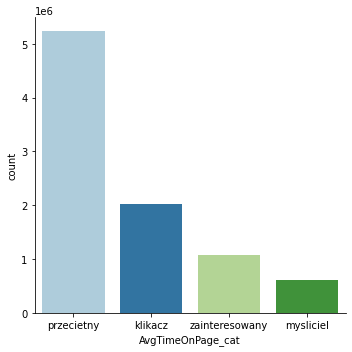

In [10]:
plt.figure(figsize=(15,10));
sns.catplot(x='AvgTimeOnPage_cat', data=df, kind="count",palette="Paired");

## ViewsCount

In [11]:
maska = df.loc[df['ViewsCount'] > 30].index 
df['ViewsCount'].loc[maska]=30

C:\Users\mateu\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
df['ViewsCount_cat'] = ['klikacz' if 2>x else ('przecietny' if 6>=x else 'mysliciel') for x in df.loc[:,'ViewsCount']]

<Figure size 1080x720 with 0 Axes>

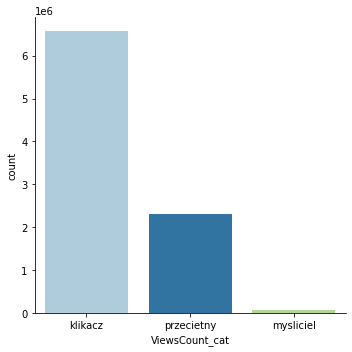

In [13]:
plt.figure(figsize=(15,10));
sns.catplot(x='ViewsCount_cat', data=df, kind="count",palette="Paired");

## WasAddedToCart

In [14]:
df["WasAddedToCart"] = df["WasAddedToCart"].astype(int)

<Figure size 1080x720 with 0 Axes>

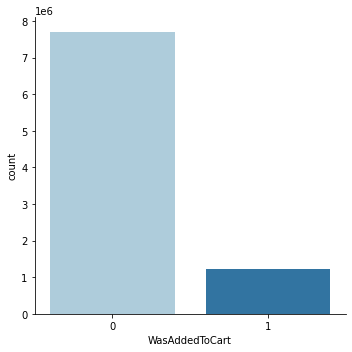

In [15]:
plt.figure(figsize=(15,10));
sns.catplot(x='WasAddedToCart', data=df, kind="count",palette="Paired");

## WasBought

In [16]:
df["WasBought"] = df["WasBought"].astype(int)

<Figure size 1080x720 with 0 Axes>

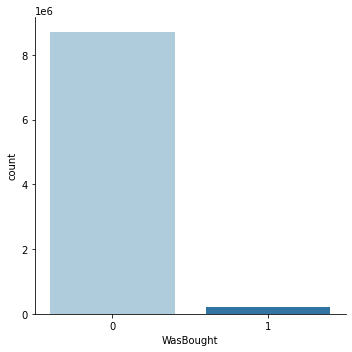

In [17]:
plt.figure(figsize=(15,10));
sns.catplot(x='WasBought', data=df, kind="count",palette="Paired");

## OpenSizeTab

In [18]:
df["OpenSizeTab"] = df["OpenSizeTab"].astype(int)

<Figure size 1080x720 with 0 Axes>

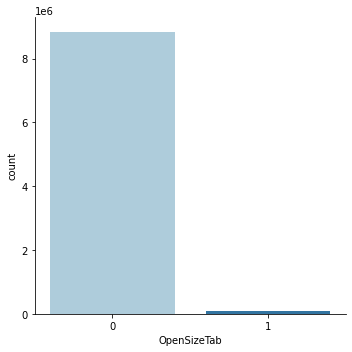

In [19]:
plt.figure(figsize=(15,10));
sns.catplot(x='OpenSizeTab', data=df, kind="count",palette="Paired");

## RecommendationClickCount

In [20]:
df.drop(['RecommendationClickCount'],axis='columns', inplace=True)

## ChangeImage

In [21]:
maska = df.loc[df['ChangeImage'] > 40].index 
df['ChangeImage'].loc[maska]=40

C:\Users\mateu\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
df['ChangeImage_cat'] = ['nieklikacz' if 1>x else ('przecietny' if 3>=x else 'mysliciel') for x in df.loc[:,'ChangeImage']]

<Figure size 1080x720 with 0 Axes>

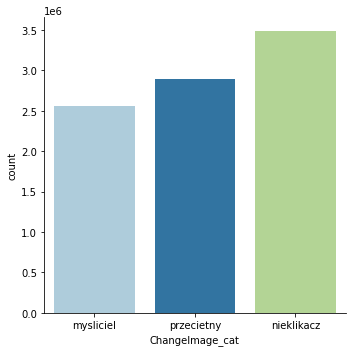

In [23]:
plt.figure(figsize=(15,10));
sns.catplot(x='ChangeImage_cat', data=df, kind="count",palette="Paired");

## AccordionExpand 

In [24]:
df['AccordionExpand_cat'] = ['nieklikacz' if 1>x else 'klikacz' for x in df.loc[:,'AccordionExpand']]

<Figure size 1080x720 with 0 Axes>

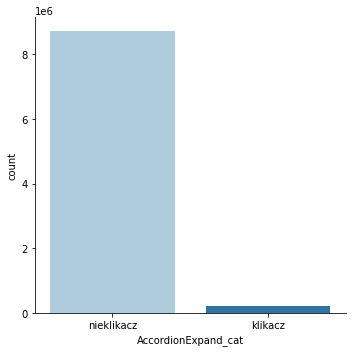

In [25]:
plt.figure(figsize=(15,10));
sns.catplot(x='AccordionExpand_cat', data=df, kind="count",palette="Paired");

## RegisterFlag 

In [26]:
df["RegisterFlag"] = df["RegisterFlag"].astype(int)

<Figure size 1080x720 with 0 Axes>

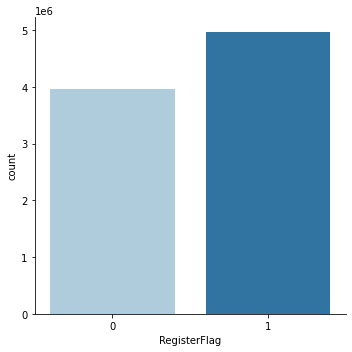

In [27]:
plt.figure(figsize=(15,10));
sns.catplot(x='RegisterFlag', data=df, kind="count",palette="Paired");

## SaleStatus 

In [28]:
df['SaleStatus'] = [1 if 'Sale'==x else 0 for x in df.loc[:,'SaleStatus']]

<Figure size 1080x720 with 0 Axes>

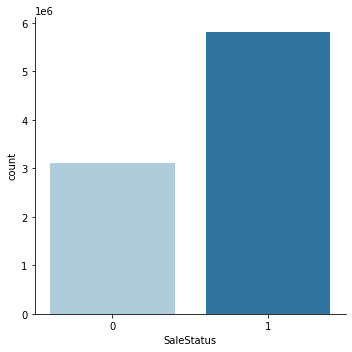

In [29]:
plt.figure(figsize=(15,10));
sns.catplot(x='SaleStatus', data=df, kind="count",palette="Paired");

## PriceCategory

<Figure size 1080x720 with 0 Axes>

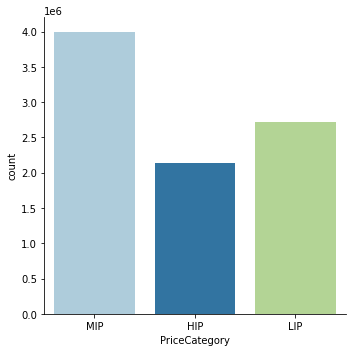

In [30]:
plt.figure(figsize=(15,10));
sns.catplot(x='PriceCategory', data=df, kind="count",palette="Paired");

In [31]:
df['LIP'] = [1 if 'LIP'==x else 0 for x in df.loc[:,'PriceCategory']]

In [32]:
df['MIP'] = [1 if 'MIP'==x else 0 for x in df.loc[:,'PriceCategory']]

In [33]:
df['HIP'] = [1 if 'HIP'==x else 0 for x in df.loc[:,'PriceCategory']]

In [34]:
df.drop(['PriceCategory'],axis='columns', inplace=True)

##  FashionLevel

In [35]:
basic=['Base','Basic','Base+','Standard','Commercial','Essential']
core=['Core Wall','Core','Core Floor']
direct=['Directional','Direction']
best=['Bestseller','Trend']
inne=['Re-Act','Continuous']

#df['DataFrame Column'] = df['DataFrame Column'].fillna(0)


In [36]:
df['FashionLevelSimple'] = ['basic' if x in basic else ('core' if x in core else ('direct' if x in direct else ('best' if x in best else 'inne'))) for x in df.loc[:,'FashionLevel']]

In [37]:
df.drop(['FashionLevel'],axis='columns', inplace=True)

<Figure size 1080x720 with 0 Axes>

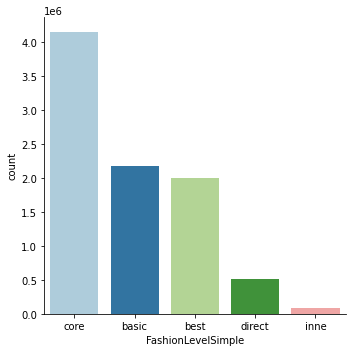

In [38]:
plt.figure(figsize=(15,10));
sns.catplot(x='FashionLevelSimple', data=df, kind="count",palette="Paired");

## ItemSeason

In [39]:
df['Season'] = df['ItemSeason'].astype(str).str[:2]

In [40]:
df.drop(['ItemSeason'],axis='columns', inplace=True)

In [41]:
df.drop(['SubclassID'],axis='columns', inplace=True)

In [42]:
df.columns

Index(['AvgTimeOnPage', 'ViewsCount', 'WasAddedToCart', 'WasBought',
       'OpenSizeTab', 'ChangeImage', 'AccordionExpand', 'NewUserId',
       'RegisterFlag', 'SaleStatus', 'ClassID', 'DepartmentName', 'AllSizes',
       'Child', 'S', 'M', 'L', 'Color', 'AvgTimeOnPage_cat', 'ViewsCount_cat',
       'ChangeImage_cat', 'AccordionExpand_cat', 'LIP', 'MIP', 'HIP',
       'FashionLevelSimple', 'Season'],
      dtype='object')

# kolor


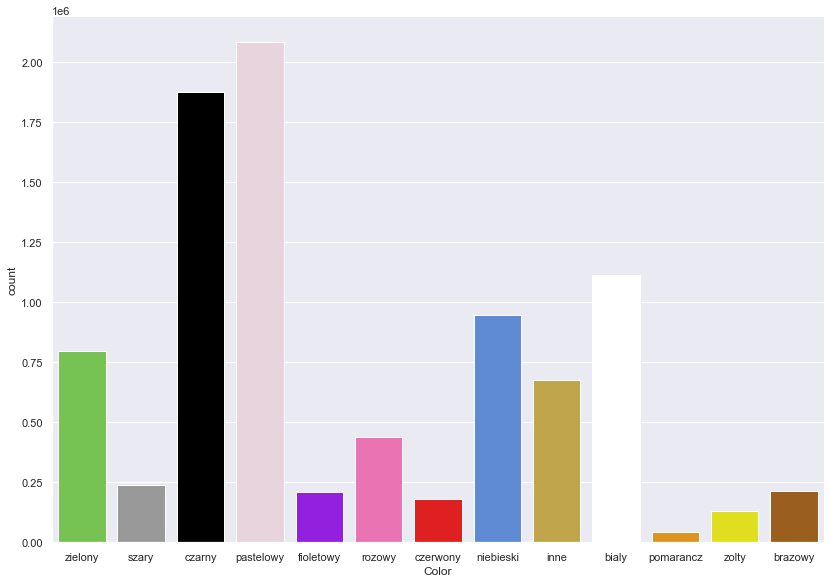

In [55]:
sns.catplot(x='Color', data=df, kind="count",palette=['#6fd542','#999999','#000000','#ead1dc','#9900ff','#fc60b4','#ff0000','#4a86e8','#d4af37','#ffffff','#ff9900','#ffff00','#ae5e0b'], height=8.27, aspect=11.7/8.27)

In [54]:
a = np.array(df['Color'])
values, counts = np.unique(a, return_counts=True)
counts

array([1113901,  212208, 1874155,  178230,  211192,  674410,  946800,
       2081891,   40696,  440056,  237082,  796037,  128549], dtype=int64)

## Zamiana miejsc kolumn


In [31]:
cols = ['NewUserId','AvgTimeOnPage',"AvgTimeOnPage_cat", 'ViewsCount', 'ViewsCount_cat','WasAddedToCart', 'WasBought',
       'OpenSizeTab', 'ChangeImage','ChangeImage_cat', 'AccordionExpand', 'AccordionExpand_cat',
       'RegisterFlag', 'SaleStatus', 'ClassID', 'DepartmentName', 'AllSizes',
       'Child', 'S', 'M', 'L', 'Color', 'LIP', 'MIP', 'HIP',
       'FashionLevelSimple', 'Season']

In [32]:
df = df[cols]
df

NewUserId  AvgTimeOnPage AvgTimeOnPage_cat  ViewsCount  \
0        629835214461368392          14.44        przecietny           1   
1        629835214461368392          10.07        przecietny           1   
2        629835214461368392          23.18        przecietny           1   
3        629835214461368392          11.64        przecietny           1   
4        629835214461368392          20.55        przecietny           1   
...                     ...            ...               ...         ...   
8935202             6884663          18.75        przecietny           1   
8935203             6884663           4.82           klikacz           2   
8935204             6884663          14.27        przecietny           3   
8935205             6884663           6.95        przecietny           2   
8935206             6884663          69.38         mysliciel           2   

        ViewsCount_cat  WasAddedToCart  WasBought  OpenSizeTab  ChangeImage  \
0              klikacz               0          0            0            5   
1              klikacz               0          0            0            4   
2              klikacz               0          0            0           11   
3              klikacz               0          0            0            4   
4              klikacz               0          0            0            5   
...                ...             ...        ...          ...          ...   
8935202        klikacz               0          0            0            8   
8935203     przecietny               0          0            0            3   
8935204     przecietny               1          0            0           11   
8935205     przecietny               0          0            0            5   
8935206     przecietny               0          0            0            3   

        ChangeImage_cat  AccordionExpand AccordionExpand_cat  RegisterFlag  \
0             mysliciel                0          nieklikacz             0   
1             mysliciel                0          nieklikacz             0   
2             mysliciel                0          nieklikacz             0   
3             mysliciel                0          nieklikacz             0   
4             mysliciel                0          nieklikacz             0   
...                 ...              ...                 ...           ...   
8935202       mysliciel                0          nieklikacz             1   
8935203      przecietny                0          nieklikacz             1   
8935204       mysliciel                0          nieklikacz             1   
8935205       mysliciel                0          nieklikacz             1   
8935206      przecietny                0          nieklikacz             1   

         SaleStatus  ClassID DepartmentName AllSizes  Child  S  M  L  \
0                 1     11.0         ladies      NaN      0  0  0  0   
1                 0    184.0         ladies      NaN      0  0  0  0   
2                 0     15.0         ladies      NaN      0  0  0  0   
3                 0     37.0    accessories      NaN      0  0  0  0   
4                 0     16.0         ladies      NaN      0  0  0  0   
...             ...      ...            ...      ...    ... .. .. ..   
8935202           1     11.0         ladies        M      0  1  1  1   
8935203           0     16.0         ladies        M      0  1  1  1   
8935204           0     16.0         ladies        M      0  1  1  1   
8935205           0     16.0         ladies        M      0  1  1  1   
8935206           1     15.0         ladies        M      0  1  1  1   

             Color  LIP  MIP  HIP FashionLevelSimple Season  
0          zielony    0    1    0               core     SS  
1            szary    0    0    1               core     AW  
2           czarny    0    1    0               core     AW  
3           czarny    0    1    0              basic     AW  
4          zielony    0    1    0           

In [33]:
df=df[['NewUserId','AvgTimeOnPage','ViewsCount','ChangeImage','AccordionExpand',"WasAddedToCart","WasBought"]]

# grupowanie klientow

In [39]:
# usuwamy NaN
df = df[df['NewUserId'].notna()]

In [40]:
# jeszcze raz tworzymy tabelke z NewUserId, tym razem bez NaN
indeksy = df['NewUserId'].unique()

In [41]:
# grupujemy sobie klientow (tuta wiersze to tylko pierwsze wiersze z grupy danego klienta, dalej wyswietlimy reszte)
gk = df.groupby('NewUserId')

In [42]:
# tworzymy tabelke z nazwami kolumn, bedzie potrzebna do petli
kolumny=df.columns
kolumny

Index(['NewUserId', 'AvgTimeOnPage', 'ViewsCount', 'ChangeImage',
       'AccordionExpand', 'WasAddedToCart', 'WasBought'],
      dtype='object')

In [43]:
from statistics import mean

In [45]:
ostateczna = pd.DataFrame(indeksy, columns=["NewUserId"])
ostateczna[kolumny[1:]] = np.nan
ostateczna[kolumny] = ostateczna[kolumny].astype(object)

tworzymy średnią zmiennych ciągłych dla klientów

In [46]:
#ŚREDNIA
for x in range(len(indeksy)):
    temp = gk.get_group(ostateczna['NewUserId'].loc[x])
    for k in kolumny[1:]:
        ostateczna.at[x,k]=[(mean(temp[k].values.tolist()))]

In [47]:
ostateczna.rename(columns={'AvgTimeOnPage': 'AvgTimeOnPage_mean', 'ViewsCount': 'ViewsCount_mean', 'ChangeImage': 'ChangeImage_mean', 'AccordionExpand': 'AccordionExpand_mean', 'WasAddedToCart': 'WasAddedToCart_mean', 'WasBought': 'WasBought_mean'}, inplace=True)

In [48]:
# zapisujemy zeby nie przechodzic przez te meki jeszcze raz
ostateczna.to_csv('ostateczna3.csv',index=True)

In [49]:
ostateczna2 = pd.DataFrame(indeksy, columns=["NewUserId"])
ostateczna2[kolumny[1:]] = np.nan
ostateczna2[kolumny] = ostateczna2[kolumny].astype(object)

tworzymy sumę zmiennych ciągłych dla klientów

In [50]:
#SUMA
for x in range(len(indeksy)):
    temp = gk.get_group(ostateczna2['NewUserId'].loc[x])
    for k in kolumny[1:]:
        ostateczna2.at[x,k]=[(sum(temp[k].values.tolist()))]

In [51]:
ostateczna2.rename(columns={'AvgTimeOnPage': 'AvgTimeOnPage_sum', 'ViewsCount': 'ViewsCount_sum', 'ChangeImage': 'ChangeImage_sum', 'AccordionExpand': 'AccordionExpand_sum', 'WasAddedToCart': 'WasAddedToCart_sum', 'WasBought': 'WasBought_sum'}, inplace=True)

In [52]:
# zapisujemy zeby nie przechodzic przez te meki jeszcze raz
ostateczna2.to_csv('ostateczna2.csv',index=True)

# 